In [160]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from scipy import*
import pylab as mp
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
data=pd.read_csv('incumplimiento.csv',sep=',',header=0)
data.iloc[:3,:]

,Folio,Incumplimiento,Estudiante,Saldo,Ingreso
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947


In [163]:
data['Estudiante_enc']=LabelEncoder().fit_transform(data['Estudiante']) 
data['Incumplimiento_enc']=LabelEncoder().fit_transform(data['Incumplimiento']) # transform as a separate step from fit

In [164]:
data.iloc[:4,:]

,Folio,Incumplimiento,Estudiante,Saldo,Ingreso,Estudiante_enc,Incumplimiento_enc
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,1,0
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0


In [165]:
X=data.iloc[:,3:6]
y=data.iloc[:,6]

In [166]:
model=LogisticRegression(C=1,solver='newton-cg',max_iter=10000).fit(X,y)
print(model.coef_[0])
print(model.intercept_)

[ 5.73060606e-03  3.96190035e-06 -6.12564492e-01]
[-10.90181163]


In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [168]:
#Modelo construido con datos de entrenamiendo 70% de la muestra
model=LogisticRegression(C=1,solver='newton-cg',max_iter =10000).fit(X_train,y_train)
print(model.coef_[0])
print(model.intercept_)

[ 5.68263313e-03  1.56387140e-06 -6.60047841e-01]
[-10.75182344]


Segmentamos la población en buenos y morosos

In [169]:
clientes_buenos=data[data['Incumplimiento_enc']==1]
clientes_morosos=data[data['Incumplimiento_enc']==0]

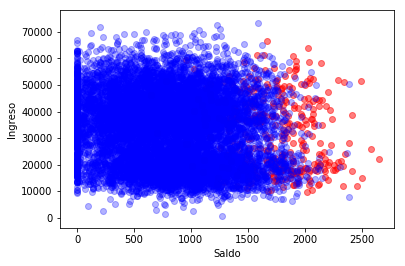

In [170]:
mp.xlabel('Saldo')
mp.ylabel('Ingreso')
mp.scatter(clientes_buenos.Saldo,clientes_buenos.Ingreso,color='red',label='',alpha=0.5,)
mp.scatter(clientes_morosos.Saldo,clientes_morosos.Ingreso,color='blue',alpha=0.3)

In [171]:
saldo=data['Saldo']
model2=LogisticRegression(C=1,solver='newton-cg',max_iter =10000).fit(X.iloc[:,0:1],y)
print(model2.coef_[0])
print(model2.intercept_)

[0.00549892]
[-10.65132857]


In [151]:
X_t=np.linspace(saldo.min(),saldo.max(),10000).reshape(-1,1)
yprob=model2.predict_proba(X_t)

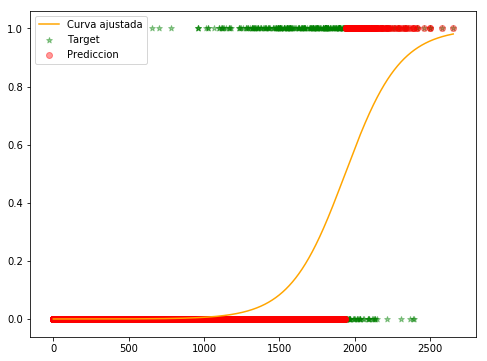

In [172]:
plt.figure(figsize=(8,6))
mp.scatter(saldo,y,color=['green'],label='Target',marker='*',alpha=0.4)
mp.scatter(saldo,yp,color='red',label='Prediccion',marker='o',alpha=0.4)
mp.plot(X_t,yprob[:,1],color='orange', label='Curva ajustada')
mp.legend()